# <center> <div style="width: 370px;"> ![Sorting](pictures/Sorting.jpg)

# <center>Sorting (Set Interface) 

One fundamental improvement we can make is to store our items in a sorted array. This way, the item with the smallest key appears first (at index 0), and the item with the largest key appears at the end. This sorted arrangement opens up the possibility of using binary search to find keys efficiently and support various Order operations. However, the question that arises is: How do we obtain a sorted array in the first place?

## Sorting

Sorting an array, denoted as A, of comparable items into increasing order is a fundamental operation in computer science and plays a crucial role in solving various computational problems. Two common sorting algorithms used for sorting small numbers of items are Insertion Sort and Selection Sort. These algorithms are favored for their simplicity and ease of implementation. Both of them are incremental, meaning they maintain and grow a sorted subset of items until the entire array is sorted. The key distinction between them lies in their approach, We will explain them further.

**note:** It's important to note that a sort operation can be either destructive or in-place:

- A destructive sort overwrites the original array A.
- An in-place sort uses only O(1) extra space and, by definition, is also destructive (in place ⊆ destructive).

### Permutation Sort

a sorting technique where you generate all possible permutations of the input data and then choose the sorted permutation. This approach is extremely inefficient and not used in practice for any non-trivial data set due to its factorial time complexity.

To clarify:

1. **Permutation Generation**: Generate all possible permutations of the input data. For an array of n elements, there are n! (n factorial) possible permutations. This step has a time complexity of O(n!).

2. **Sorting**: Compare each generated permutation to find the one in sorted order. This step may also take O(n!) time in the worst case.

The total time complexity of this informal ***Permutation Sort*** would be `O(n! * n!)`, which is impractical for even moderately sized inputs.

### Selection Sort


This algorithm maintains and grows a subset of the largest `i` items in sorted order.
**How the algorithm works: ** 
- find the largest number in prefix `A[:i+1]` and swap it to `A[i]`
- recursivly sort prefix `A[i]`
we have another way.
Let's take a closer look at Selection Sort with a Python implementation. After sorting the largest items into a sub-array `A[i+1:]`, the algorithm repeatedly scans the array to identify the largest item that hasn't been sorted yet and swaps it with the item at position A[i]. While Selection Sort can require Ω(n^2) comparisons in the worst case, it will perform at most O(n) swaps.


```python 
def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        max_index = i
        for j in range(i + 1, n):
            if arr[j] > arr[max_index]:
                max_index = j
        arr[i], arr[max_index] = arr[max_index], arr[i]
```

## Insertion Sort

Insertion Sort is a simple yet efficient sorting algorithm that operates by recursively sorting the prefix of an array and then assuming that the prefix up to a certain point is already sorted. The core idea is to insert each element from the unsorted part of the array into its correct position within the sorted part.

Let's break down the process step by step using the example array `[8, 2, 4, 9, 3]`:

1. Initially, we start with the first element of the array as the sorted prefix: `[8]` and the rest as the unsorted part: `[2, 4, 9, 3]`.

2. We then assume that the prefix `[8]` is already sorted and proceed to insert the next element, which is `2`. Since `2` is smaller than `8`, we swap them to get `[2, 8]`.

3. The next element is `4`. We insert it into the sorted prefix `[2, 8]` by comparing it to `8` and shifting `8` to the right to get `[2, 4, 8]`.

4. Continue this process for the remaining elements. When we reach `9`, we don't need to swap because it's greater than `8`, so we have `[2, 4, 8, 9]`.

5. Finally, we insert `3` by comparing it with `9`, `8`, `4`, and `2`, and shifting them accordingly. We end up with the fully sorted array `[2, 3, 4, 8, 9]`.

Here's the Python implementation of Insertion Sort:


```python
def insertion_sort(A, i=None):
    '''Sort A[:i + 1]'''
    if i is None:
        i = len(A) - 1
    if i > 0:
        insertion_sort(A, i - 1)
        insert_last(A, i)

def insert_last(A, i):
    '''Sort A[:i + 1] assuming sorted A[:i]'''
    if i > 0 and A[i] < A[i - 1]:
        A[i], A[i - 1] = A[i - 1], A[i]
        insert_last(A, i - 1)
```


- **Insertion Sort Analysis**:
  - Base case: For `i = 0`, the array has one element and is already sorted (`Θ(1)` time complexity).
  - Induction: Assuming correctness for `i`, the algorithm sorts `A[:i]` by induction, and then `insert_last` correctly sorts the rest as demonstrated above.
  - Total time complexity: `T(1) = Θ(1)`, `T(n) = T(n - 1) + Θ(n)`, which leads to `T(n) = Θ(n^2)`.

- **Insert Last Function Analysis**:
  - Base case: For `i = 0`, the array has one element, so it's already sorted (`Θ(1)` time complexity).
  - Induction: Assuming correctness for `i`, if `A[i] >= A[i - 1]`, the array is sorted; otherwise, swapping the last two elements allows us to sort `A[:i]` by induction.
  - Time complexity: `S(1) = Θ(1)`, `S(n) = S(n - 1) + Θ(1)`, which leads to `S(n) = Θ(n)`.

Insertion Sort is a valuable sorting algorithm due to its simplicity and ability to handle small to moderately sized data sets efficiently. However, for very large data sets, more advanced sorting algorithms with better time complexity, such as QuickSort or MergeSort, are preferred.

## In_Place and Stability

Both insertion sort and selection sort are ***in-place*** algorithms, implying that they both require at most a constant amount of additional space. These algorithms exclusively utilize operations like comparisons and swaps between pairs of elements in the array. Notably, insertion sort is a ***stable*** sorting algorithm, ensuring that items with the same value will maintain their original order as they appeared in the input array. Conversely, the provided implementation of selection sort is not stable. For instance, when given the input `(2, 1, 1')`, it would yield the output `(1', 1, 2)`, demonstrating instability.

Merge Sort is an efficient sorting algorithm introduced during the lecture. It excels in sorting large numbers of items with an asymptotically faster performance compared to other algorithms. The core idea behind merge sort is to recursively sort the left and right halves of an array and then merge them back together in linear time.

The recurrence relation for merge sort is given by `T(n) = 2T(n/2) + Θ(n)`. Solving this recurrence relation yields `T(n) = Θ(n log n)`. This time complexity of `Θ(n log n)` is significantly closer to linear time than quadratic time, as the logarithmic function log n grows much slower than the polynomial function `n^ε` for `ε > 0`.

Here's a breakdown of the provided Python implementation:




```python
def merge_sort(A, a=0, b=None):  # Sort sub-array A[a:b]
    if b is None:  # O(1) initialize
        b = len(A)  # O(1)
    if 1 < b - a:  # O(1) size k = b - a
        c = (a + b + 1) // 2  # O(1) compute center
        merge_sort(A, a, c)  # T(k/2) recursively sort left
        merge_sort(A, c, b)  # T(k/2) recursively sort right
        L, R = A[a:c], A[c:b]  # O(k) copy
        i, j = 0, 0  # O(1) initialize pointers
        while a < b:  # O(n)
            if (j >= len(R)) or (i < len(L) and L[i] < R[j]):  # O(1) check side
                A[a] = L[i]  # O(1) merge from the left
                i = i + 1  # O(1) decrement the left pointer
            else:
                A[a] = R[j]  # O(1) merge from the right
                j = j + 1  # O(1) decrement the right pointer
            a = a + 1  # O(1) decrement the merge pointer
```




It's important to note that merge sort uses a linear amount of temporary storage during the merging process, so it is not considered an in-place sorting algorithm. While there are algorithms that perform merging with no additional space, they are typically more complex than merge sort.

The stability of merge sort depends on how tie-breaking is handled during the merging process. The provided implementation is not stable, but it can be made stable with a minor modification. Making merge sort stable involves ensuring that when two elements are equal, their original order is preserved during merging.

For CoffeeScript visualizers and additional resources related to the merge step of this algorithm and its recursive call structure, you can refer to the provided link.
[This link](https://codepen.io/mit6006/pen/RYJdOG) and [This link](https://codepen.io/mit6006/pen/wEXOOq)




### Build a Sorted Array

With an algorithm to sort our array in `Θ(n log n)`, we can now complete our table! We sacrifice
some time in building the data structure to speed up order queries. This is a common technique
called ***preprocessing***.

|Data Structure|Operations O(.)|Operations O(.)       |Operations O(.)               |Operations O(.)             |Operations O(.)             |
|--------------|---------------|----------------------|------------------------------|----------------------------|----------------------------|
|              |Container      |Static                |Dynamic                       |Order                       |Order                       |
|              |build(X)       |find(k)               |insert(x)/delete(k)           |find_min()/find_max()       |find_prev(k)/find_next(k)   |
|Array         |<center>n      |<center>n             |<center>n                     |<center>n                   |<center>n                   |
|Sortes Array  |$$ n \log n $$ |$$ \log n $$          |<center>n                     |<center>1                   |$$ \log n $$                |


## Recurrences

There are three primary methods for solving recurrences:
- **Substitution:** Guess a solution and substitute to show the recurrence holds.
- **Recursion Tree:** Draw a tree representing the recurrence and sum computation at nodes.
This is a very general method, and is the one we’ve used in lecture so far.
- **Master Theorem:** A general formula to solve a large class of recurrences. It is useful, but can also be hard to remember. 

## Master Theorem

The ***Master*** Theorem provides a way to solve recurrence relations in which recursive calls decrease problem size by a constant factor. Given a recurrence relation of the form `T(n) = aT(n/b)+f(n)` and `T(1) = Θ(1)`, with branching factor `a ≥ 1`, problem size reduction factor `b > 1`, and asymptotically non-negative function `f(n)`, the Master Theorem gives the solution to the recurrence by comparing `f(n)` to $$ a^{\log_b n} = n^{\log_a b} $$  the number of leaves at the bottom of the recursion tree. When `f(n)` grows asymptotically faster than $$ n^{\log_b a} $$ the work done at each level decreases
geometrically so the work at the root dominates; alternatively, when `f(n)` grows slower, the work done at each level increases geometrically and the work at the leaves dominates. When their growth rates are comparable, the work is evenly spread over the tree’s `O(log n)` levels.


# <center> <div style="width: 800px;"> 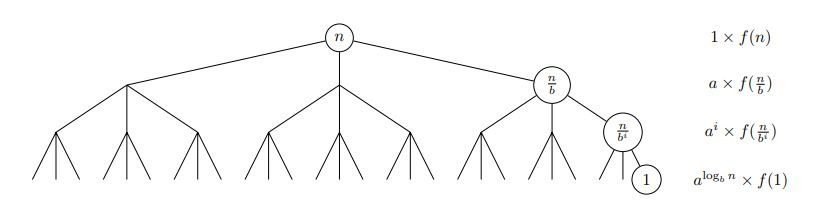

|case|solution|conditions|
|-|-|-|
|1|$$ T(n) = \theta (n^{\log_b a})$$|$$ f(n) = O(n^{log_b {a−ε}})$$ <center>for some constant ε > 0|
|2|$$ T(n) = \theta (n^{\log_b a} \log^{k+1} n)$$| $$ f(n) = \theta (n^{\log_b a} \log^{k+1} n) $$ <center>for some constant k ≥ 0
|3|$$ T(n) = Θ(f(n)) $$| $$ f(n) = Ω(n^{\log_b {a+ε}}) $$ <center>for some constant ε > 0 and af(n/b) < cf(n) for some constant 0 < c < 1

The Master Theorem takes on a simpler form when `f(n)` is a polynomial, such that the recurrence has the from $$ T(n) = aT(\frac{n}{b}) + Θ(n^c) $$ for some constant `c ≥ 0`.

| case | solution                     | condition         | intuition                      |
| ---- | ----------------------------- | ----------------- | ------------------------------- |
| 1    | $$ T(n) = Θ(n^{\log_b a}) $$  | $$ c < \log_b a $$ | Work done at leaves dominates |
|2   | $$ T(n) = Θ(n^c \log n)  $$ | $$ c = \log_b a $$| Work balanced across the tree|
|3   | $$ T(n) = Θ(n^c)         $$ | $$c > \log_b a  $$| Work done at root dominates  |